In [2]:
# Database Connection
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# Data Science
import pandas as pd
import numpy as np

# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Assign SQL variables
SQL_USERNAME = "postgres"
SQL_PASSWORD = "admin!" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "project_two_etl" # change this

In [4]:
# Set up Engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Use the inspector to print the column names within each table and its data types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(250)
email VARCHAR(250)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(500)
goal INTEGER
pledged INTEGER
outcome VARCHAR(100)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(5)
launched_date DATE
end_date DATE
category_id VARCHAR(5)
subcategory_id VARCHAR(8)
last_updated TIMESTAMP

category
category_id VARCHAR(5)
category VARCHAR(100)
last_updated TIMESTAMP

subcategory
subcategory_id VARCHAR(8)
subcategory VARCHAR(100)
last_updated TIMESTAMP



In [6]:
# Load the data
campaign_df = pd.read_csv('CSV/campaign.csv')
category_df = pd.read_csv('CSV/category.csv')
subcategory_df = pd.read_csv('CSV/subcategory.csv')
contacts_df = pd.read_csv('CSV/contacts.csv')

# Print column names to verify
print("Campaign DF columns:", campaign_df.columns)
print("Category DF columns:", category_df.columns)
print("Subcategory DF columns:", subcategory_df.columns)
print("Contacts DF columns:", contacts_df.columns)

# Check for the presence of 'category_id' and 'subcategory_id'
if 'category_id' in campaign_df.columns and 'subcategory_id' in campaign_df.columns:
    # Merge the dataframes
    merged_df = campaign_df.merge(category_df, how='left', on='category_id')\
                           .merge(subcategory_df, how='left', on='subcategory_id')\
                           .merge(contacts_df, how='left', on='contact_id')
    print("Merge successful. Merged DataFrame:")
    print(merged_df.head())
else:
    print("One or more required columns are missing in the campaign DataFrame.")

Campaign DF columns: Index(['cf_id', 'contact_id', 'company_name', 'description', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_date',
       'end_date', 'category_id', 'subcategory_id'],
      dtype='object')
Category DF columns: Index(['category_id', 'category'], dtype='object')
Subcategory DF columns: Index(['subcategory_id', 'subcategory'], dtype='object')
Contacts DF columns: Index(['contact_id', 'first_name', 'last_name', 'email'], dtype='object')
Merge successful. Merged DataFrame:
   cf_id  contact_id                 company_name  \
0    147        4661   Baldwin, Riley and Jackson   
1   1621        3765                     Odom Inc   
2   1812        4187   Melton, Robinson and Fritz   
3   2156        4941  Mcdonald, Gonzalez and Ross   
4   1365        2199                Larson-Little   

                                     description      goal   pledged  \
0           Pre-emptive tertiary standardization     100.0       0.0   
1 

In [7]:
# Define the query
query = """
    SELECT *
    FROM contacts
"""

# Execute the query and read the results into a DataFrame
try:
    with engine.connect() as conn:
        contacts_df = pd.read_sql_query(text(query), conn)
    print(contacts_df.head())
except Exception as e:
    print(f"An error occurred: {e}")

   contact_id first_name last_name                         email  \
0        4661    Cecilia   Velasco  cecilia.velasco@rodrigues.fr   
1        3765    Mariana     Ellis       mariana.ellis@rossi.org   
2        4187      Sofie     Woods       sofie.woods@riviere.com   
3        4941   Jeanette  Iannotti   jeanette.iannotti@yahoo.com   
4        2199     Samuel   Sorgatz      samuel.sorgatz@gmail.com   

                last_updated  
0 2024-07-17 17:54:45.052499  
1 2024-07-17 17:54:45.052499  
2 2024-07-17 17:54:45.052499  
3 2024-07-17 17:54:45.052499  
4 2024-07-17 17:54:45.052499  


In [8]:
# Retrieve full category table from Postgres
query = """
    SELECT *
    FROM subcategory
"""

# Execute the query and read the results into a DataFrame
try:
    with engine.connect() as conn:
        subcategory_df = pd.read_sql_query(text(query), conn)
    print(subcategory_df.head())
except Exception as e:
    print(f"An error occurred: {e}")

  subcategory_id  subcategory               last_updated
0        subcat1  food trucks 2024-07-17 17:54:49.566887
1        subcat2         rock 2024-07-17 17:54:49.566887
2        subcat3          web 2024-07-17 17:54:49.566887
3        subcat4        plays 2024-07-17 17:54:49.566887
4        subcat5  documentary 2024-07-17 17:54:49.566887


In [9]:
# Retrieve full subcategory table from Postgres
query = """
    SELECT *
    FROM subcategory
    """
try:
    with engine.connect() as conn:
        subcategory_df = pd.read_sql_query(text(query), conn)
    print(subcategory_df.head())
except Exception as e:
    print(f"An error occurred: {e}")

  subcategory_id  subcategory               last_updated
0        subcat1  food trucks 2024-07-17 17:54:49.566887
1        subcat2         rock 2024-07-17 17:54:49.566887
2        subcat3          web 2024-07-17 17:54:49.566887
3        subcat4        plays 2024-07-17 17:54:49.566887
4        subcat5  documentary 2024-07-17 17:54:49.566887


In [10]:
# Retrieve full campaign table from Postgres
query = """
    SELECT *
    FROM campaign
    """
try:
    with engine.connect() as conn:
        campaign_df = pd.read_sql_query(text(query), conn)
    print(campaign_df.head())
except Exception as e:
    print(f"An error occurred: {e}")

   cf_id  contact_id                 company_name  \
0    147        4661   Baldwin, Riley and Jackson   
1   1621        3765                     Odom Inc   
2   1812        4187   Melton, Robinson and Fritz   
3   2156        4941  Mcdonald, Gonzalez and Ross   
4   1365        2199                Larson-Little   

                                     description    goal  pledged     outcome  \
0           Pre-emptive tertiary standardization     100        0      failed   
1               Managed bottom-line architecture    1400    14560  successful   
2   Function-based leadingedge pricing structure  108400   142523  successful   
3  Vision-oriented fresh-thinking conglomeration    4200     2477      failed   
4                      Proactive foreground core    7600     5265      failed   

   backers_count country currency launched_date    end_date category_id  \
0              0      CA      CAD    1970-01-01  1970-01-01        cat1   
1            158      US      USD    1970-01

In [11]:
# Query for 'US'
query = """
    SELECT
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'US'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
"""

# Execute the query and fetch results
with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    columns = result.keys()

# Load the results into a DataFrame
question1us = pd.DataFrame(data, columns=columns)

# Display the top 10 rows
question1us.head(10)

,category,outcome,count,country
0,film & video,successful,76,US
1,film & video,failed,41,US
2,food,successful,17,US
3,food,failed,15,US
4,games,successful,14,US
5,games,failed,20,US
6,journalism,successful,4,US
7,music,successful,79,US
8,music,failed,44,US
9,photography,successful,24,US


In [24]:
# Calculate metrics for the United States (US)
metrics_us = campaign_df[campaign_df['country'] == 'US'].agg({
    'backers_count': 'sum',
    'pledged': 'sum',
    'goal': 'sum'
}).rename({
    'backers_count': 'total_backers_count',
    'pledged': 'total_pledged',
    'goal': 'total_goal'
}).to_frame().T

metrics_us['country'] = 'US'
print(metrics_us)

   total_backers_count  total_pledged  total_goal country
0               545510       31409336    32908300      US


In [23]:
# Calculate metrics for China (CH)
metrics_ch = campaign_df[campaign_df['country'] == 'CH'].agg({
    'backers_count': 'sum',
    'pledged': 'sum',
    'goal': 'sum'
}).rename({
    'backers_count': 'total_backers_count',
    'pledged': 'total_pledged',
    'goal': 'total_goal'
}).to_frame().T

metrics_ch['country'] = 'CH'
print(metrics_ch)

   total_backers_count  total_pledged  total_goal country
0                14374         891415     1139600      CH


In [18]:
# Query for 'CH'
query = """
    SELECT
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'CH'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
"""

# Execute the query and fetch results
with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    columns = result.keys()

# Load the results into a DataFrame
question1us = pd.DataFrame(data, columns=columns)

# Display the top 10 rows
question1us.head(10)

,category,outcome,count,country
0,film & video,successful,3,CH
1,film & video,failed,2,CH
2,games,successful,1,CH
3,music,successful,2,CH
4,music,failed,2,CH
5,publishing,successful,2,CH
6,technology,successful,1,CH
7,theater,successful,3,CH
8,theater,failed,2,CH


In [19]:
# Query for 'AU'
query = """
    SELECT
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'AU'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
"""

# Execute the query and fetch results
with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    columns = result.keys()

# Load the results into a DataFrame
question1us = pd.DataFrame(data, columns=columns)

# Display the top 10 rows
question1us.head(10)

,category,outcome,count,country
0,film & video,successful,6,AU
1,film & video,failed,3,AU
2,food,successful,1,AU
3,food,failed,1,AU
4,games,successful,2,AU
5,games,failed,1,AU
6,music,successful,2,AU
7,music,failed,2,AU
8,photography,successful,1,AU
9,photography,failed,2,AU


In [26]:
# Calculate metrics for Australia (AU)
metrics_au = campaign_df[campaign_df['country'] == 'AU'].agg({
    'backers_count': 'sum',
    'pledged': 'sum',
    'goal': 'sum'
}).rename({
    'backers_count': 'total_backers_count',
    'pledged': 'total_pledged',
    'goal': 'total_goal'
}).to_frame().T

metrics_au['country'] = 'AU'
print(metrics_au)

   total_backers_count  total_pledged  total_goal country
0                34226        2114541     2253000      AU


In [25]:
# Calculate metrics for Canada (CA)
metrics_ca = campaign_df[campaign_df['country'] == 'CA'].agg({
    'backers_count': 'sum',
    'pledged': 'sum',
    'goal': 'sum'
}).rename({
    'backers_count': 'total_backers_count',
    'pledged': 'total_pledged',
    'goal': 'total_goal'
}).to_frame().T

metrics_ca['country'] = 'CA'
print(metrics_ca)

   total_backers_count  total_pledged  total_goal country
0                46931        2812788     2382500      CA


In [21]:
# Query for 'CA'
query = """
    SELECT
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'CA'
    GROUP BY cat.category, cam.outcome, cam.country
    ORDER BY cat.category, cam.outcome DESC;
"""

# Execute the query and fetch results
with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    columns = result.keys()

# Load the results into a DataFrame
question1us = pd.DataFrame(data, columns=columns)

# Display the top 10 rows
question1us.head(10)

,category,outcome,count,country
0,film & video,successful,3,CA
1,film & video,failed,4,CA
2,food,failed,2,CA
3,music,successful,5,CA
4,music,failed,2,CA
5,photography,failed,2,CA
6,publishing,successful,3,CA
7,technology,successful,4,CA
8,theater,successful,7,CA
9,theater,failed,9,CA


In [14]:
# # Query for 'US'
# query = """
#     SELECT
#         cat.category,
#         cam.outcome,
#         COUNT(cam.outcome) AS count,
#         cam.country
#     FROM campaign AS cam
#     JOIN category AS cat ON (cam.category_id = cat.category_id)
#     WHERE cam.outcome IN ('successful', 'failed')
#         AND cam.country = 'US'
#     GROUP BY cat.category, cam.outcome, cam.country
#     ORDER BY cat.category, cam.outcome DESC;
#     """
# question1us = pd.read_sql(text(query), con=engine)
# question1us.head(10) 

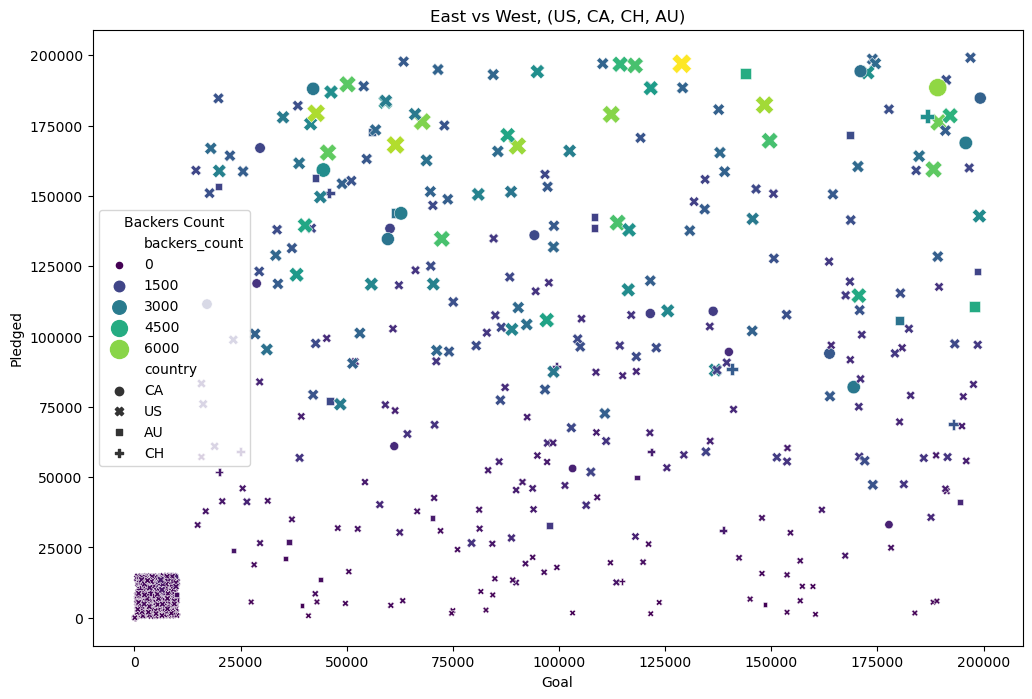

In [27]:
# Filter data for specific countries
filtered_df = merged_df[merged_df['country'].isin(['US', 'CA', 'CH', 'AU'])]

# Scatter plot with seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='goal', y='pledged', hue='backers_count', style='country', palette='viridis', size='backers_count', sizes=(20, 200))

# Add labels and title
scatter_plot.set_xlabel('Goal')
scatter_plot.set_ylabel('Pledged')
scatter_plot.set_title('East vs West, (US, CA, CH, AU)')

# Display the plot
plt.legend(title='Backers Count')
plt.show()

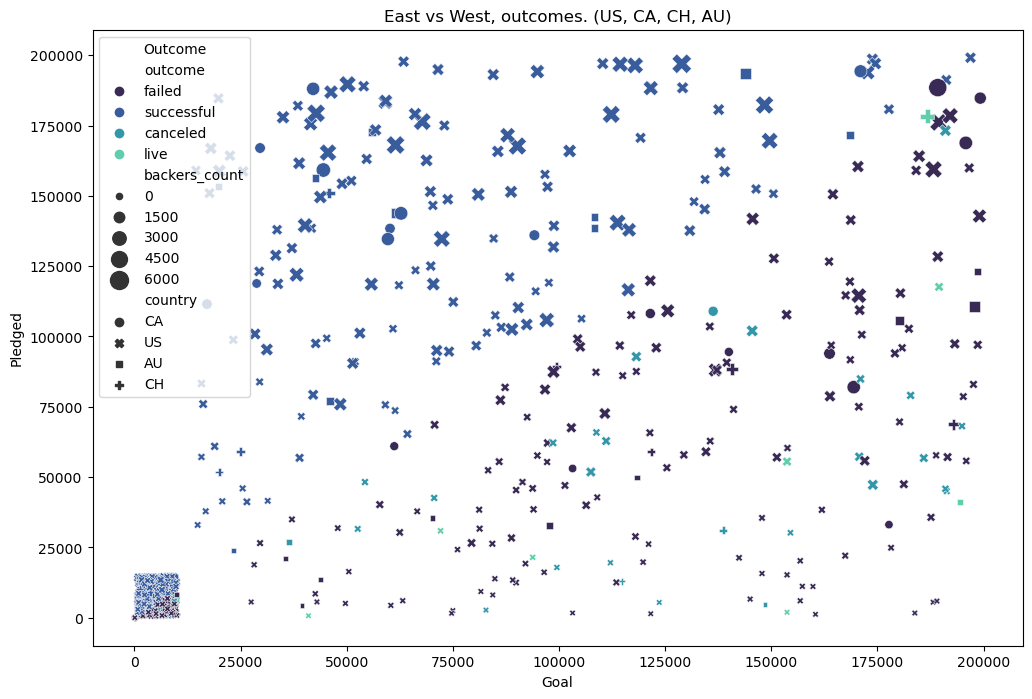

In [28]:
# Filter data for specific countries, East v West
filtered_df = merged_df[merged_df['country'].isin(['US', 'CA', 'CH', 'AU'])]

# Scatter plot with seabees
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='goal', y='pledged', hue='outcome', style='country', palette='mako', size='backers_count', sizes=(20, 200))

# Add labels and title
scatter_plot.set_xlabel('Goal')
scatter_plot.set_ylabel('Pledged')
scatter_plot.set_title('East vs West, outcomes. (US, CA, CH, AU)')

# show me the money
plt.legend(title='Outcome')
plt.show()


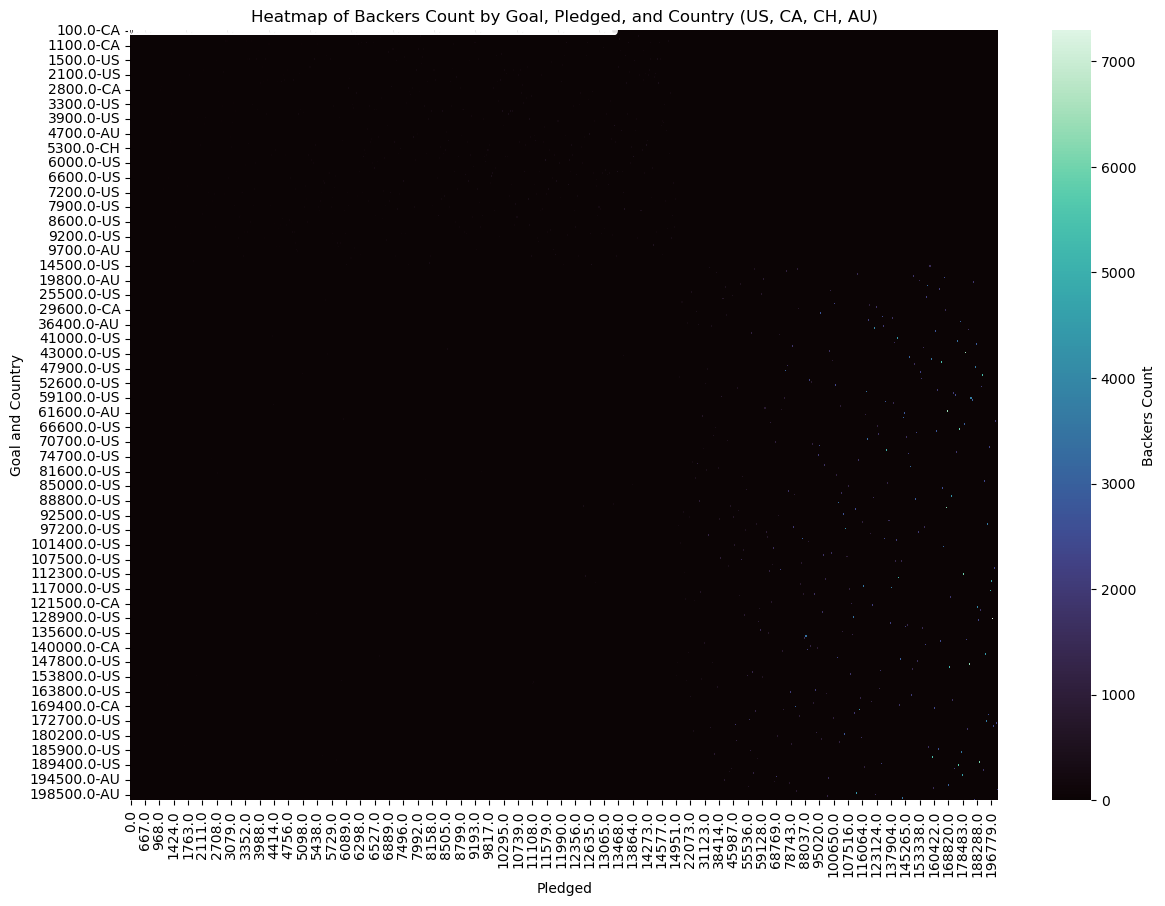

In [12]:
# Create a pivot table for the heatmap
heatmap_data = filtered_df.pivot_table(index=['goal', 'country'], columns='pledged', values='backers_count', aggfunc='sum').fillna(0)

# Create the heatmap
plt.figure(figsize=(14, 10))
heatmap_plot = sns.heatmap(heatmap_data, cmap='mako', annot=True, fmt='g', cbar_kws={'label': 'Backers Count'})

# Add labels and title
heatmap_plot.set_xlabel('Pledged')
heatmap_plot.set_ylabel('Goal and Country')
heatmap_plot.set_title('Heatmap of Backers Count by Goal, Pledged, and Country (US, CA, CH, AU)')

# Display the plot
plt.show()

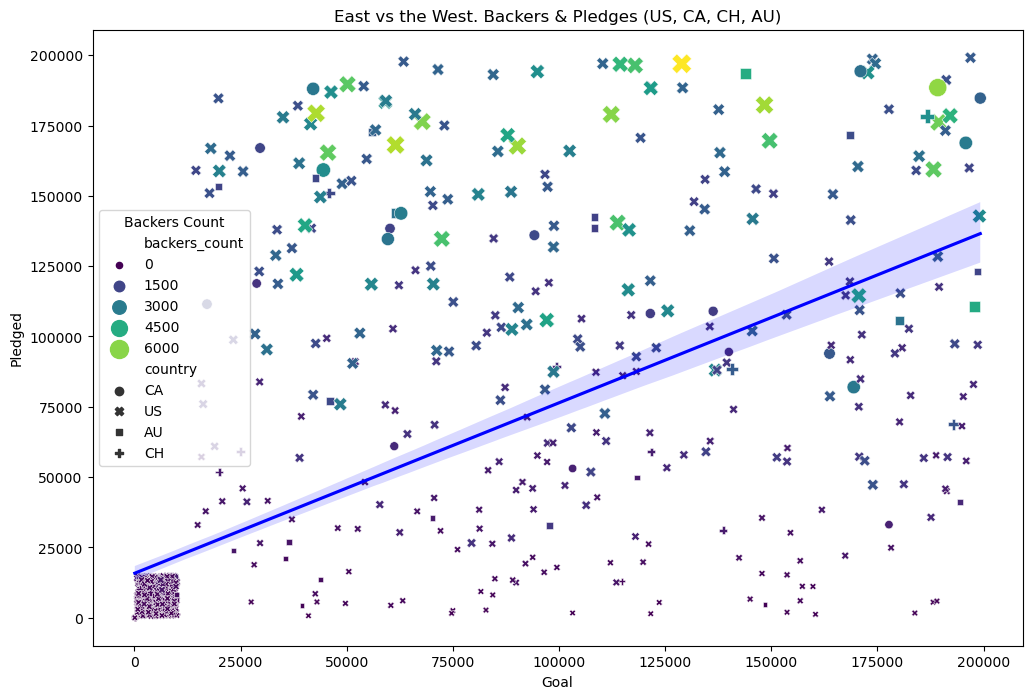

In [17]:
# Filter data for specific countries
filtered_df = merged_df[merged_df['country'].isin(['US', 'CA', 'CH', 'AU'])]

# Scatter plot with seaborn
plt.figure(figsize=(12, 8))

# Add scatter plot
scatter_plot = sns.scatterplot(data=filtered_df, x='goal', y='pledged', hue='backers_count', style='country', palette='viridis', size='backers_count', sizes=(20, 200))

# Add regression line
sns.regplot(data=filtered_df, x='goal', y='pledged', scatter=False, ax=scatter_plot, color='blue')

# Add labels and title
scatter_plot.set_xlabel('Goal')
scatter_plot.set_ylabel('Pledged')
scatter_plot.set_title('East vs the West. Backers & Pledges (US, CA, CH, AU)')

# Display the plot
plt.legend(title='Backers Count')
plt.show()

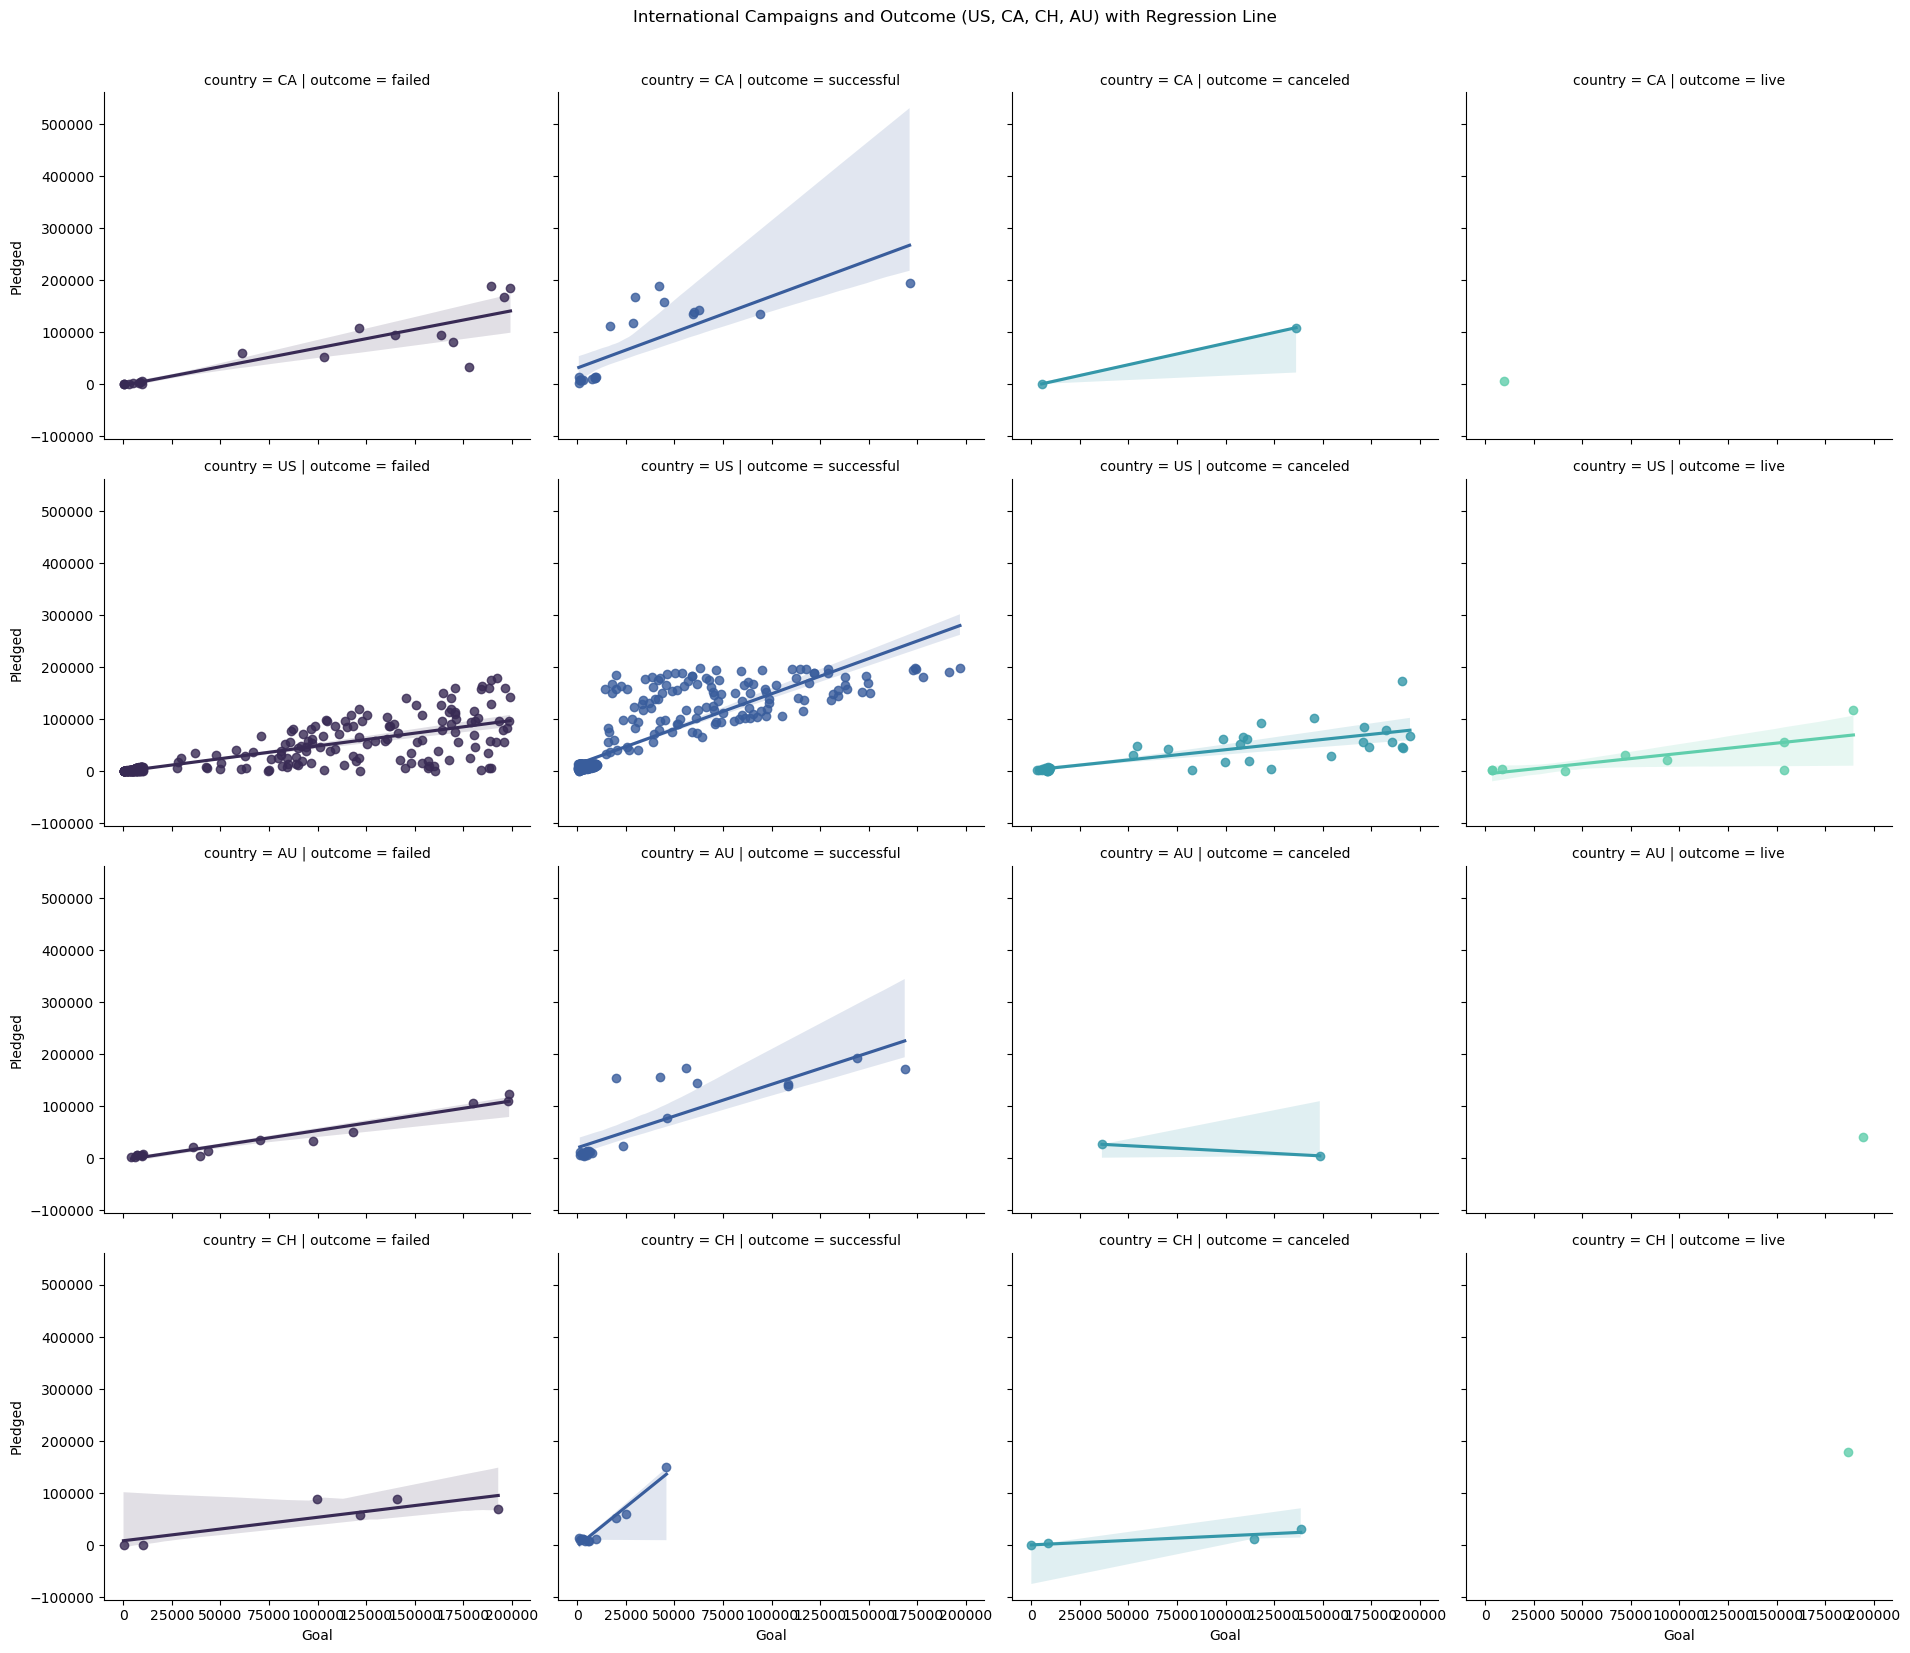

In [29]:
# Filter data for specific countries
filtered_df = merged_df[merged_df['country'].isin(['US', 'CA', 'CH', 'AU'])]

# Scatter plot with regression lines using lmplot
lmplot = sns.lmplot(data=filtered_df, x='goal', y='pledged', hue='outcome', col='outcome', row='country', palette='mako', height=4, aspect=1.2)

# Add labels and title
lmplot.set_axis_labels('Goal', 'Pledged')
lmplot.fig.suptitle('International Campaigns and Outcome (US, CA, CH, AU) with Regression Line', y=1.03)

# Display the plot
plt.show()

In [ ]:
# Close Connection
engine.dispose()